The following notebook is based on the Numpy tutorial for [CS213n](https://cs231n.github.io/python-numpy-tutorial/) with some additional comments.

Other useful links:

- https://jalammar.github.io/visual-numpy/
- https://numpy.org/learn/
- https://www.youtube.com/watch?v=QUT1VHiLmmI

In [2]:
import numpy as np

### Arrays and array construction

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can create a `numpy` array by passing a Python list to `np.array()`.

In [34]:
a = np.array([1, 2, 3])  # Create a rank 1 array

This creates the array we can see on the right here:

![](http://jalammar.github.io/images/numpy/create-numpy-array-1.png)

In [35]:
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


To create a `numpy` array with more dimensions, we can pass nested lists, like this:

![](http://jalammar.github.io/images/numpy/numpy-array-create-2d.png)

![](http://jalammar.github.io/images/numpy/numpy-3d-array.png)

In [36]:
b = np.array([[1,2],[3,4]])   # Create a rank 2 array
print(b)

[[1 2]
 [3 4]]


In [37]:
print(b.shape)

(2, 2)


There are often cases when we want numpy to initialize the values of the array for us. numpy provides methods like `ones()`, `zeros()`, and `random.random()` for these cases. We just pass them the number of elements we want it to generate:

![](http://jalammar.github.io/images/numpy/create-numpy-array-ones-zeros-random.png)

We can also use these methods to produce multi-dimensional arrays, as long as we pass them a tuple describing the dimensions of the matrix we want to create:

![](http://jalammar.github.io/images/numpy/numpy-matrix-ones-zeros-random.png)

![](http://jalammar.github.io/images/numpy/numpy-3d-array-creation.png)

Sometimes, we need an array of a specific shape with “placeholder” values that we plan to fill in with the result of a computation. The `zeros` or `ones` functions are handy for this:

In [38]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [39]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [3]:
c = np.full((2,2), 7) # Create a constant array
print(c)

d = np.ones((2,2))* 7
print(d)

[[7 7]
 [7 7]]
[[7. 7.]
 [7. 7.]]


In [41]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [42]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.03869018 0.54230148]
 [0.50254116 0.13746872]]


Note the data type of the array is `float64` by default. We can specify the data type by passing the `dtype` argument to the function.

In [68]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]], dtype=np.float32)
b = np.ones((3,4), dtype=np.int32)
c = np.full((3,4), 3, dtype=np.float32)
d = np.eye(3, dtype=np.int64)

print(f"{a = }, {a.dtype}")
print(f"{b = }, {b.dtype}")
print(f"{c = }, {c.dtype}")
print(f"{d = }, {d.dtype}")

a = array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32), float32
b = array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32), int32
c = array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]], dtype=float32), float32
d = array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]), int64


Numpy also has two useful functions for creating sequences of numbers: `arange` and `linspace`.

The `arange` function accepts three arguments, which define the start value, stop value of a half-open interval, and step size. (The default step size, if not explicitly specified, is 1; the default start value, if not explicitly specified, is 0.)

The `linspace` function is similar, but we can specify the number of values instead of the step size, and it will create a sequence of evenly spaced values.

In [43]:
f = np.arange(10,50,5)   # Create an array of values starting at 10 in increments of 5
print(f)

[10 15 20 25 30 35 40 45]


In [44]:
g = np.linspace(0., 1., num=5)
print(g)

[0.   0.25 0.5  0.75 1.  ]


Sometimes, we may want to construct an array from existing arrays by “stacking” the existing arrays, either vertically or horizontally. We can use `vstack()` (or `row_stack`) and `hstack()` (or `column_stack`), respectively.

In [45]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [46]:
a = np.array([[7], [8], [9]])
b = np.array([[4], [5], [6]])
np.hstack((a,b))

array([[7, 4],
       [8, 5],
       [9, 6]])

### Array indexing

Numpy offers several ways to index into arrays.

We can index and slice numpy arrays in all the ways we can slice Python lists:

![](http://jalammar.github.io/images/numpy/numpy-array-slice.png)

And you can index and slice numpy arrays in multiple dimensions. If slicing an array with more than one dimension, you should specify a slice for each dimension:

![](http://jalammar.github.io/images/numpy/numpy-matrix-indexing.png)

In [8]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
c = a[0:, 1:3]
print(c)

print(b)

[[ 2  3]
 [ 6  7]
 [10 11]]
[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [10]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


**Note:** This is a very common source of bugs. So be careful when you want to modify a slice of an array and not the original array. In that case, you should explicitly make a copy of the slice.

In [49]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
view = a[:2, 1:3]
copy = np.array(a[:2, 1:3])
copy2 = a[:2, 1:3].copy()

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [50]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array:

In [51]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a. Remember list(range(1,2)) = [1]
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [52]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [53]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [12]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[77 77]
[77 77]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [55]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [56]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [60]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [13]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [14]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


When working with numpy arrays, it’s often helpful to get the *indices* (not only the values) of array elements that meet certain conditions. There are a few numpy functions that you’ll definitely want to remember:

-   [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) (get index of maximum element in array)
-   [`argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) (get index of minimum element in array)
-   [`argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) (get sorted list of indices, by element value, in ascending order)
-   [`where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) (get indices of elements that meet some condition)

In [63]:
a = np.array([1, 8, 9, -3, 2, 4, 7, 9])

# Get the index of the maximum element in a
print(np.argmax(a))

# Get the index of the minimum element in a
# (this array has two elements with the maximum value -
# only one index is returned)
print(np.argmin(a))

# Get sorted list of indices
print(np.argsort(a))

# Get sorted list of indices in descending order
# [::-1] is a special slicing index that returns the reversed list
print(np.argsort(a)[::-1])

# Get indices of elements that meet some condition
# this returns a tuple, the list of indices is the first entry
# so we use [0] to get it
print(np.where(a > 5)[0])

# Get indices of elements that meet some condition
# this example shows how to get the index of *all* the max values
print(np.where(a >= a[np.argmax(a)])[0])

2
3
[3 0 4 5 6 1 2 7]
[7 2 1 6 5 4 0 3]
[1 2 6 7]
[2 7]


### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [28]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

What makes working with `numpy` so powerful and convenient is that it comes with many *vectorized* math functions for computation over elements of an array. These functions are highly optimized and are *very* fast - much, much faster than using an explicit `for` loop.

For example, let’s create a large array of random values and then sum it both ways. We’ll use a `%%time` *cell magic* to time them.

In [29]:
a = np.random.random(100000000)

In [30]:
%%time
x = np.sum(a)

CPU times: user 98 ms, sys: 375 μs, total: 98.4 ms
Wall time: 96.8 ms


In [31]:
%%time
x = 0
for element in a:
  x = x + element

CPU times: user 11.4 s, sys: 2.45 ms, total: 11.4 s
Wall time: 11.4 s


Look at the “Wall Time” in the output - note how much faster the vectorized version of the operation is! This type of fast computation is a major enabler of machine learning, which requires a *lot* of computation.

Whenever possible, we will try to use these vectorized operations.

Some mathematic functions are available both as operator overloads and as functions in the numpy module.

For example, you can perform an elementwise sum on two arrays using either the + operator or the `add()` function.

![](http://jalammar.github.io/images/numpy/numpy-arrays-adding-1.png)

![](http://jalammar.github.io/images/numpy/numpy-matrix-arithmetic.png)

In [70]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


And this works for other operations as well, not only addition:

![](http://jalammar.github.io/images/numpy/numpy-array-subtract-multiply-divide.png)

In [71]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [72]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [75]:
# Elementwise division; both produce the array
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [76]:
# Elementwise square root; produces the array
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot()` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot()` is available both as a function in the numpy module and as an instance method of array objects:

![](http://jalammar.github.io/images/numpy/numpy-matrix-dot-product-1.png)

In [77]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [78]:
print(v @ w)

219


In [79]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [80]:
# Matrix / matrix product; both produce the rank 2 array
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Besides for the functions that overload operators, Numpy also provides many useful functions for performing computations on arrays, such as `min()`, `max()`, `sum()`, and others:

![](http://jalammar.github.io/images/numpy/numpy-matrix-aggregation-1.png)

In [81]:
x = np.array([[1, 2], [3, 4], [5, 6]])

print(np.max(x))  # Compute max of all elements; prints "6"
print(np.min(x))  # Compute min of all elements; prints "1"
print(np.sum(x))  # Compute sum of all elements; prints "21"

6
1
21


Not only can we aggregate all the values in a matrix using these functions, but we can also aggregate across the rows or columns by using the `axis` parameter:

![](http://jalammar.github.io/images/numpy/numpy-matrix-aggregation-4.png)

In [82]:
x = np.array([[1, 2], [5, 3], [4, 6]])

print(np.max(x, axis=0))  # Compute max of each column; prints "[5 6]"
print(np.max(x, axis=1))  # Compute max of each row; prints "[2 5 6]"

[5 6]
[2 5 6]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object.

![](http://jalammar.github.io/images/numpy/numpy-transpose.png)

In [83]:
x = np.array([[1, 2], [3, 4], [5, 6]])

print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]
 [5 6]]
transpose
 [[1 3 5]
 [2 4 6]]


In [84]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


In more advanced use case, you may find yourself needing to change the dimensions of a certain matrix. This is often the case in machine learning applications where a certain model expects a certain shape for the inputs that is different from your dataset. numpy's `reshape()` method is useful in these cases.

![](http://jalammar.github.io/images/numpy/numpy-reshape.png)

A common task in this class will be to convert a 1D array to a 2D array, and vice versa. We can use `reshape()` for this.

For example, suppose we had this 2D array, but we need to pass it to a function that expects a 1D array.

In [85]:
w = np.array([[1],[2],[3]])
print(w)
w.shape

[[1]
 [2]
 [3]]


(3, 1)

We can remove the “unnecessary” extra dimension with

In [86]:
y = w.reshape(-1,)
print(y)
y.shape

[1 2 3]


(3,)

Note that we can pass -1 as one dimension and numpy will infer the correct size based on our matrix size!

There’s also a `squeeze()` function that removes *all* of the “unnecessary” dimensions (dimensions that have size 1) from an array:

In [87]:
z = w.squeeze()
print(z)
z.shape

[1 2 3]


(3,)

To go from a 1D to 2D array, we can just add in another dimension of size 1:

In [88]:
y.reshape((-1,1))

array([[1],
       [2],
       [3]])

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations.

For example: basic linear algebra, we can only add (and perform similar element-wise operations) two matrics that have the *same* dimension. In numpy, if we want to add two matrics that have different dimensions, numpy will implicitly “extend” the dimension of one matrix to match the other so that we can perform the operation.

So these operations will work, instead of returning an error:

![](https://sebastianraschka.com/images/blog/2020/numpy-intro/broadcasting-1.png)

![](https://sebastianraschka.com/images/blog/2020/numpy-intro/broadcasting-2.png)

Broadcasting two arrays together follows these rules:

**Rule 1**: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

For example, in the following cell, `a` will be implicitly extended to shape (1,3):

In [89]:
a = np.array([1,2,3])         # has shape (3,): one dimension
b = np.array([[4], [5], [6]]) # has shape (3,1): two dimensions
c = a + b                     # will have shape (3,3) (two dimensions)

**Rule 2**: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

For example, in the following cell `a` will be implicitly extended to shape (3,2):

In [90]:
a = np.array([[1],[2],[3]])         # has shape (3,1)
b = np.array([[4,5], [6,7], [8,9]]) # has shape (3,2)
c = a + b                           # will have shape (3,2)

**Rule 3**: If in any dimension the sizes disagree and neither is equal to 1, an error is raised:

In [51]:
a = np.array([[1],[2],[3],[4]])      # has shape (4,1)
b = np.array([[4,5], [6,7], [8,9]])  # has shape (3,2)
c = a + b                            # ValueError: operands could not be broadcast

ValueError: operands could not be broadcast together with shapes (4,1) (3,2) 

For more detail, you can read the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are a few visual examples involving broadcasting.

![](http://jalammar.github.io/images/numpy/numpy-array-broadcast.png)

Note that these arrays are compatible in each dimension if they have either the same size in that dimension, or if one array has size 1 in that dimension.

![](http://jalammar.github.io/images/numpy/numpy-matrix-broadcast.png)

And here are some more practical applications:

In [94]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [95]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [96]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [97]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [98]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. In this section we give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

By convention, we typically import this module using the `plt` alias:

In [99]:
import matplotlib.pyplot as plt

### Plotting

The most important function in `matplotlib` is `plot`, which allows you to plot 2D data as a line plot. Here is a simple example:

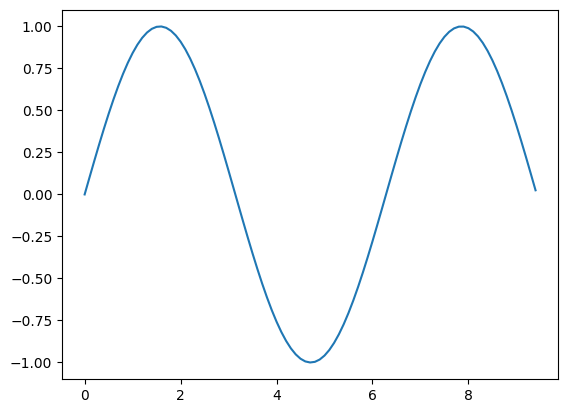

In [100]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

# Show the figure.
plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

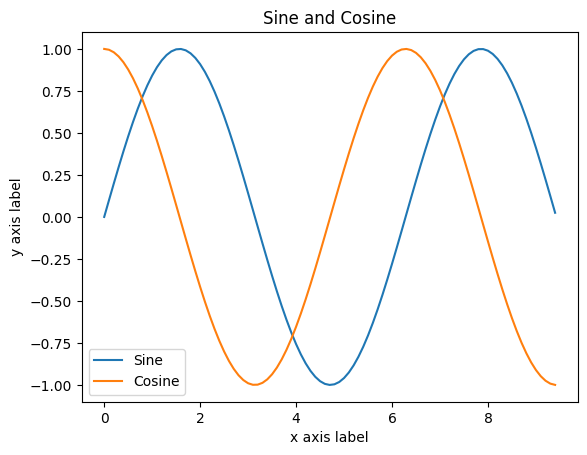

In [101]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin, label='Sine')
plt.plot(x, y_cos, label='Cosine')
plt.legend() # uses the label arguments given above

plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')

# Show the figure.
plt.show()

Another useful, basic, plot is the `scatter` plot:

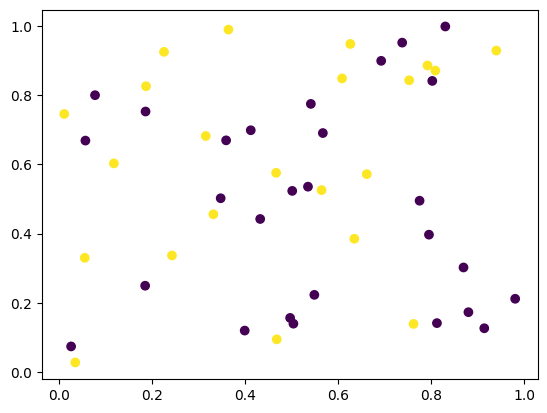

In [102]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.randint(0, 2, 50)

plt.scatter(x, y, c=colors)

plt.show()

When there is no logical connection between adjacent points (for example: if the horizontal axis is a categorical variable without a logical order), then you should *not* connect them (as in a line plot), since this implies a relationship that does not exist! Instead, you would use a scatter plot.

### Subplots

You can plot different things in the same figure using the `subplot` function. Here is an example:

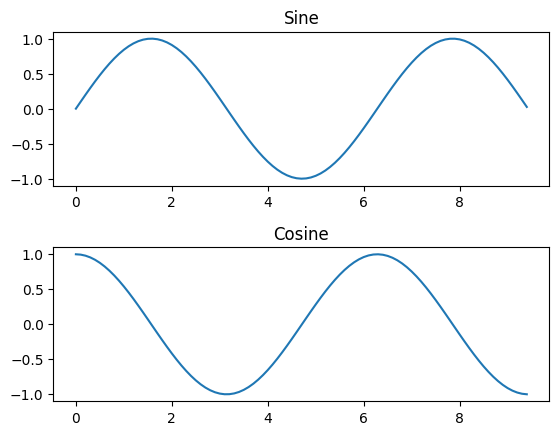

In [103]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Adjust spacing between subplots
plt.subplots_adjust(hspace = 0.4)

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

You can use the `imshow` function to display images from a file. Here is an example:

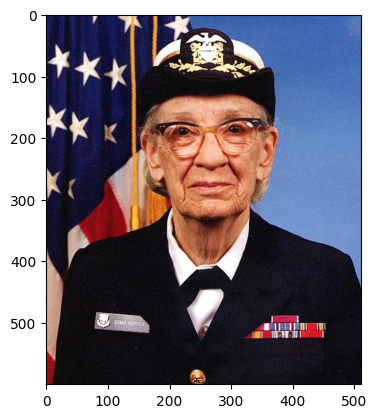

In [104]:
from matplotlib.cbook import get_sample_data

img_file = get_sample_data('grace_hopper.jpg')

img = plt.imread(img_file)
plt.imshow(img)
plt.show()

The `matplotlib` library is very flexible, and you can create virtually any plot and modify its appearance in any way you might think of. If you don’t like the way your plot looks, fix it! Use the [documentation](http://matplotlib.org/api/pyplot_api.html) to learn more.

If you want slighltly better looking plots with minimal syntax changes, you can use the `seaborn` [library](https://seaborn.pydata.org/). It is built on top of `matplotlib` and provides a high-level interface for drawing attractive and informative statistical graphics.
